# Part 1. Exploartory Data Analysis (EDA)

### Data Overview
* Description of your dataset(source, context, size, number of features)
* Summary statistics for numerical and categorical variables.
* Data types and any preprocessing steps already completed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('salesdaily.csv')
df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,1/3/2014,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,1/4/2014,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,1/5/2014,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,1/6/2014,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


- source: from Kaggle
- context: this dataset is consisted of 600,000 transactional data collected in 6 years (2014 - 2019), indicating the daily sales data. 
    * M01AB - Anti-inflammatory and antirheumatic products, non-steroids, Acetic acid derivatives and related substances
    * M01AE - Anti-inflammatory and antirheumatic products, non-steroids, Propionic acid derivatives
    * N02BA - Other analgesics and antipyretics, Salicylic acid and derivatives
    * N02BE/B - Other analgesics and antipyretics, Pyrazolones and Anilides
    * N05B - Psycholeptics drugs, Anxiolytic drugs
    * N05C - Psycholeptics drugs, Hypnotics and sedatives drugs
    * R03 - Drugs for obstructive airway diseases
    * R06 - Antihistamines for systemic use

In [3]:
df.shape

(2106, 13)

size  
*    rows: 2106  
*    column: 13

number of features:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datum         2106 non-null   object 
 1   M01AB         2106 non-null   float64
 2   M01AE         2106 non-null   float64
 3   N02BA         2106 non-null   float64
 4   N02BE         2106 non-null   float64
 5   N05B          2106 non-null   float64
 6   N05C          2106 non-null   float64
 7   R03           2106 non-null   float64
 8   R06           2106 non-null   float64
 9   Year          2106 non-null   int64  
 10  Month         2106 non-null   int64  
 11  Hour          2106 non-null   int64  
 12  Weekday Name  2106 non-null   object 
dtypes: float64(8), int64(3), object(2)
memory usage: 214.0+ KB


descriptive statistic

In [5]:
df.describe()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000
mean,5.033683,3.895830,3.880441,29.917095,8.853627,0.593522,5.512262,2.900198,2016.401235,6.344255,275.945869
std,2.737579,2.133337,2.384010,15.590966,5.605605,1.092988,6.428736,2.415816,1.665060,3.386954,1.970547
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,190.000000
25%,3.000000,2.340000,2.000000,19.000000,5.000000,0.000000,1.000000,1.000000,2015.000000,3.000000,276.000000
50%,4.990000,3.670000,3.500000,26.900000,8.000000,0.000000,4.000000,2.000000,2016.000000,6.000000,276.000000
75%,6.670000,5.138000,5.200000,38.300000,12.000000,1.000000,8.000000,4.000000,2018.000000,9.000000,276.000000
max,17.340000,14.463000,16.000000,161.000000,54.833333,9.000000,45.000000,15.000000,2019.000000,12.000000,276.000000


### Exploratory Visualizations
* At least five meaningful visualizations (e.g., histograms, box plots, scatter plots, bar charts).
* Use Plotly for interactive plots where possible.
* Include clear titles, labels, and legends.
* Provide interpretation for each visualization (what does it reveal about the data?).


In [6]:
import plotly.express as px
import plotly.graph_objects as go

#### Bar chart of total sales volume of each drug category

In [7]:
drug_cols = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']
total_sales = df[drug_cols].sum().reset_index()
total_sales.columns = ['Drug Category', 'Total Sales']

fig = px.bar(total_sales, x='Drug Category', y='Total Sales', title='Total Sales by Drug Category', labels={'Total Sales':'Total Sales Amount', 'Drug Category':'Drug Category'})

fig.show()

From the bar chart, N02BE appears to be the most popular drug category, while N05C is the least popular, indicating a clear disparity in sales across drug categories.

#### Line chart of sales trends for each type of medicine

In [8]:
df_ma = df[drug_cols].rolling(window=7, min_periods=1).mean()  

fig = go.Figure()

colors = px.colors.qualitative.Plotly
color_nap = {col: colors[i % len(colors)] for i, col in enumerate(drug_cols)}

for col in drug_cols:
    fig.add_trace(go.Scatter(
        x=df['datum'],
        y=df[col],
        mode='lines',
        name=col,
        line=dict(width=2, color=color_nap[col])
    ))

for col in drug_cols:
    fig.add_trace(go.Scatter(
        x=df['datum'],
        y=df_ma[col],
        mode='lines',
        name=f"{col} Trend",
        line=dict(width=3, color='red'),
        visible=False  
    ))

fig.update_layout(
    title='Daily Sales Trends by Drug Category',
    xaxis_title='Date',
    yaxis_title='Sales Amount',
    width=1500,
    height=900,
    font=dict(size=14),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    margin=dict(l=50, r=50, t=80, b=50)
)

buttons = []
n = len(drug_cols)
for i, col in enumerate(drug_cols):
    visible = [False]*(2*n)
    visible[i] = True            
    visible[i + n] = True         
    buttons.append(dict(
        label=col,
        method="update",
        args=[{"visible": visible},
              {"title": f"Daily Sales Trend - {col}"}]
    ))

buttons.insert(0, dict(
    label="All",
    method="update",
    args=[{"visible": [True]*n + [False]*n},
          {"title": "Daily Sales Trends - All Categories"}]
))

fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        x=1.15,
        y=0.8
    )]
)


fig.show()

The sales data for N02BE shows an abnormal value on 12/20/2016, while overall it follows a roughly annual cycle.   
Similarly, R06 exhibits a clear yearly pattern, with peak sales typically occurring in May.

#### Box plot of drug sales distribution

In [9]:
fig = px.box(df, y = drug_cols, title = 'Sales Distribution per Drug Category', labels={'value':'Sales Amount', 'variable':'Drug Category'})
fig.show()

For the category N02BE, the interquartile range (25th to 75th percentile) is approximately 19 to 39.8. The upper fence is 67.15, yet there are numerous observations exceeding this thershold, with the manimum value reaching 161.  
In the context of sales data, values beyond the upper fence do not necessarily indicate anomalies; rather, they may reflect seasonal peaks, promotional campaigns, or unexpected demand surges.   
  
Similar patterns of extreme values beyond the upper fence are also observed across other drug categories, suggesting that such spikes are likely driven by underlying market dynamics rather than data errors or outliers.

#### bar chart of total sales volume by day of the week

In [10]:
weekday_sales = df.groupby('Weekday Name')[drug_cols].sum().reset_index()
weekday_sales['Total'] = weekday_sales[drug_cols].sum(axis=1)

fig = px.bar(weekday_sales, x = 'Weekday Name', y = 'Total', title = 'Total Sales by Weekday', labels={'Total':'Total Sales Amount', 'Weekday Name':'Day of the Week'})
fig.show()

from this bar chart, we can see that Saturday has the highest total sales amount among a week, and Thursady has the lowest total sales amount among a week

#### Drug category correlation heat map Drug category correlation heat map

In [11]:
import plotly.figure_factory as ff

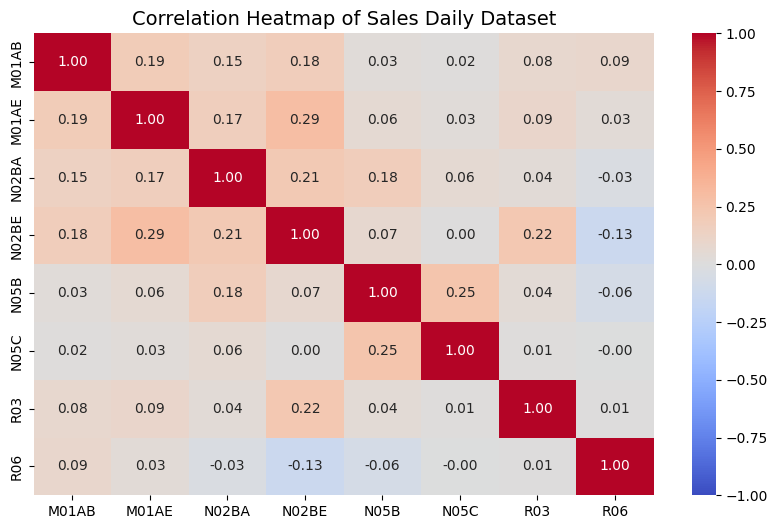

In [12]:
corr = df[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Sales Daily Dataset', fontsize=14)
plt.show()

From the heatmap:
* Moderate positive correlations (0.15 - 0.30 range):
    * M01AE and N02BE: 0.29 - moderate positive correlation, indicating these two drug categories often increase or decrease together.
    * M01AB correlates positively with M01AE (~0.19) and N02BE (~0.18).
    * N02BA has moderate positive correlation with N02BE (~0.21).
    * R03 shows moderate positive correlation with N02BE (~0.22).
* Many correlation hover around 0.0 to 0.1, indicate weak or no linear relationship.
* Negative Correlations:
    * N02BE and R06 -0.13: weak negative correlation, it suggests that when sales one drug increase, sales of the other tend to decrease. For example, if N02BE sales increase, R06 sales go decrease.

# Part 2. Dashboard Creation

Develop an interactive dashboard that communicates the most important findings from your EDA.   
   
Your dashboard should:
* Contain at least 3 interactive elements (e.g., dropdowns, sliders, hover tooltips, filters).
* Include multiple plots or summary components (e.g., counts, averages, comparisons).
* Be well-organized with a clear, intuitive layout.
* Use consistent color schemes and labeling.

### Description of the Dashboard Module
* Sales Overview & Summary
* Trend Analysis
* Seasonality & Cycle

In [13]:
from ipywidgets import widgets, interactive
from IPython.display import display
from jupyter_dash import JupyterDash
from dash import dcc, html, Input, Output, Dash
import dash_bootstrap_components as dbc

In [16]:
app = JupyterDash(__name__)

df['datum'] = pd.to_datetime(df['datum'])

app.layout = html.Div([
    html.H1('Pharma Sales Dashboard', style={'textAlign': 'center'}),
    
    html.Label("Select Date Range:"),
    dcc.RangeSlider(
        id='date-slider',
        min=df['datum'].min().timestamp(),
        max=df['datum'].max().timestamp(),
        value=[df['datum'].min().timestamp(), df['datum'].max().timestamp()],
        marks={int(d.timestamp()): d.strftime('%Y-%m-%d') 
               for d in pd.date_range(df['datum'].min(), df['datum'].max(), freq='M')},
        step=24*60*60
    ),
    
    html.Label("Filter by Sales Amount:"),
    dcc.RangeSlider(
        id='sales-filter',
        min=0,
        max=df[drug_cols].max().max(),
        value=[0, df[drug_cols].max().max()],
        marks={0: '0', int(df[drug_cols].max().max()): str(int(df[drug_cols].max().max()))}
    ),
    
    dcc.Tabs([
        dcc.Tab(label='Sales Overview', children=[
            html.Label("Select Drug Categories:"),
            dcc.Dropdown(
                id='sales-dropdown',
                options=[{'label': col, 'value': col} for col in drug_cols],
                value=drug_cols,  
                multi=True
            ),
            dcc.Graph(id='sales-overview')
        ]),
        
        dcc.Tab(label='Daily Trends', children=[
            html.Label("Select Drug Categories:"),
            dcc.Dropdown(
                id='trend-dropdown',
                options=[{'label': col, 'value': col} for col in drug_cols],
                value=drug_cols,  
                multi=True
            ),
            dcc.Graph(id='daily-trend')
        ]),
        
        dcc.Tab(label='Seasonality', children=[
            html.Label("Select Drug Category:"),
            dcc.Dropdown(
                id='season-dropdown',
                options=[{'label': col, 'value': col} for col in drug_cols],
                value=drug_cols[0],
                multi=False
            ),
            dcc.Graph(id='seasonality')
        ]),
        
        dcc.Tab(label='Daily Sales Distribution', children=[
            html.Label("Select Drug Categories:"),
            dcc.Dropdown(
                id='scatter-dropdown',
                options=[{'label': col, 'value': col} for col in drug_cols],
                value=drug_cols[:2],  
                multi=True
            ),
            dcc.Graph(id='scatter-graph')
        ])
    ])
])

@app.callback(
    Output('sales-overview', 'figure'),
    Input('sales-dropdown', 'value'),
    Input('date-slider', 'value'),
    Input('sales-filter', 'value')
)
def update_sales(selected_cols, date_range, sales_range):
    start = pd.to_datetime(date_range[0], unit='s')
    end = pd.to_datetime(date_range[1], unit='s')
    filtered_df = df[(df['datum'] >= start) & (df['datum'] <= end)]
    if not selected_cols:
        return px.bar(title="No categories selected")
    filtered_df = filtered_df[selected_cols].clip(lower=sales_range[0], upper=sales_range[1])
    df_sum = filtered_df.sum().reset_index()
    df_sum.columns = ['Drug', 'Total Sales']
    fig = px.bar(df_sum, x='Drug', y='Total Sales', color='Drug',
                 title='Total Sales by Drug Category')
    return fig

@app.callback(
    Output('daily-trend', 'figure'),
    Input('trend-dropdown', 'value'),
    Input('date-slider', 'value')
)
def update_trend(selected_cols, date_range):
    start = pd.to_datetime(date_range[0], unit='s')
    end = pd.to_datetime(date_range[1], unit='s')
    filtered_df = df[(df['datum'] >= start) & (df['datum'] <= end)]
    if not selected_cols:
        return px.line(title="No categories selected")
    fig = px.line(filtered_df, x='datum', y=selected_cols, title='Daily Sales Trend')
    return fig

@app.callback(
    Output('seasonality', 'figure'),
    Input('season-dropdown', 'value'),
    Input('date-slider', 'value')
)
def update_season(cat, date_range):
    start = pd.to_datetime(date_range[0], unit='s')
    end = pd.to_datetime(date_range[1], unit='s')
    filtered_df = df[(df['datum'] >= start) & (df['datum'] <= end)]
    df_ma = filtered_df[cat].rolling(window=7, min_periods=1).mean()
    fig = px.line(filtered_df, x='datum', y=cat, title=f'Seasonality of {cat}')
    fig.add_scatter(x=filtered_df['datum'], y=df_ma, mode='lines', name='7-Day MA', line=dict(color='red'))
    return fig

@app.callback(
    Output('scatter-graph', 'figure'),
    Input('scatter-dropdown', 'value'),
    Input('date-slider', 'value')
)
def update_scatter(selected_cols, date_range):
    start = pd.to_datetime(date_range[0], unit='s')
    end = pd.to_datetime(date_range[1], unit='s')
    filtered_df = df[(df['datum'] >= start) & (df['datum'] <= end)]
    if not selected_cols:
        return px.scatter(title="No categories selected")
    df_long = filtered_df.melt(id_vars=['datum'], value_vars=selected_cols, var_name='Drug', value_name='Sales')
    fig = px.scatter(df_long, x='datum', y='Sales', color='Drug', hover_data=['Drug','Sales'],
                     title='Daily Sales Scatter by Drug Category')
    return fig

app.run(mode='external', debug=True, port=8050)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/dash/dash.py:634: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



### ***Pharma Sales Dashboard Overview***
This interactive dashboard provides a comprehensive view of daily sales data across multiple drug categories. It is divided into four main tabs, each offering differnet perspectives and analytical insights:   
1. Sales Overview   
* Displays the total sales of selected drug categories in a bar chart.
* Users can select one or multiple drugs from the dropdown menu to compare overall sales.  
* Users can also filter by other dimensions (e.g., region, category) to focus on specific subsets of the data.
2. Daily Trends  
* Shows the day-to-day sales trends of the chosed drug categories in a line chart.  
* Useful for identifying spikes, drops, and general sales patterns over time.  
* Includes sliders to select specific date ranges for detailed trend analysis.
3. Seasonality  
* Highlights the seasonal patterns of a specific drug category.
* Include a 7-day moving average to smooth short-term fluctuations and emphasize trends.
* Users can apply filters to focus on particular categories or time periods.
4. Daily Sales Distribution
* Provides a scatter plot of daily sales for selected drug categories
* Users can select one or multiple drugs, and hover tooltips display detailed sales values for each day.
* Facilitates a detailed comparison of daily sales points and helps identify variability and patterns across drugs. 

# Part 3. Submission Summary
   
The dataset contains daily sales data for multiple pharmaceutical drug categories. The purpose of analyzing this dataset is to understand overall sales performance, identify temporal patterns, and explore relationships between differnet drugs. During the exploratory data analysis, I ovserved that some drug categories consistently had higher sales than other, with noticeable fluctuations corresponding to seasonal or promotional effects. Box plots and trend analyses highlighted variability across categories, and moving averages helped smooth short-term spikes, making underlying trends more apparent.   
   
The interactive dashboard provides a comprehensive view of these insights. Users can explore the data through dropdown menus, sliders, and other filters to select specific drug categories or date ranges. The Sales Overview tab allows users to compare total sales across selected drug categories. The Daily Trends tab highlights day-to-day fluctuations, helping identify peaks, dips, and consistent patterns. The Seasonality tab emphasizes periodic trends with a 7-day moving average for individual drugs. Finally, the Daily Sales Distribution tab visualizes the scatter of daily sales, showing variability and enabling detailed comparisons across drugs. Overall, the dashboard facilitates interactive exploration of sales patterns, helping users make data-driven decisions. 
     
Through this project, I learned how to combine EDA and interactive visualization to communicate insights effectively. Limitations include the influence of promotions or seasonal campaigns on apparent outliers, which may not represent anomalies or abnormalities. Future steps could include forecasting sales, analyzing correlations between drugs or market conditions.